# Libreire

In [2]:
import bagpy
from bagpy import bagreader

import pandas as pd, numpy as np, matplotlib.pyplot as plt

from tabulate import tabulate

# Read

In [3]:
path = 'C:/Users/miche/Desktop/Virtual Environment/Tests 11-01/Bags 11-01/'

In [4]:
topic_dict = {}

In [5]:
bag = bagreader(path + 'subset2.bag')

print("\n The bag contains the following topics:")
print(tabulate(bag.topic_table, headers='keys', tablefmt='psql'))


for topic in bag.topics:
    csv_name = bag.message_by_topic(topic)
    topic_dict[topic] = pd.read_csv(csv_name)

[INFO]  Data folder C:/Users/miche/Desktop/Virtual Environment/Tests 11-01/Bags 11-01/subset2 already exists. Not creating.

 The bag contains the following topics:
+----+---------------------+---------------------------+-----------------+-------------+
|    | Topics              | Types                     |   Message Count |   Frequency |
|----+---------------------+---------------------------+-----------------+-------------|
|  0 | /cmd_vel_out_filled | geometry_msgs/Twist       |            4860 |     20.9958 |
|  1 | /imu/data_filtered  | sensor_msgs/Imu           |            4044 |     19.85   |
|  2 | /touch_data         | triskarino_msgs/touchdata |            4818 |     20.8032 |
+----+---------------------+---------------------------+-----------------+-------------+


In [6]:
topic_dict['/cmd_vel_out_filled']

,Time,linear.x,linear.y,linear.z,angular.x,angular.y,angular.z
0,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
1,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
2,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
3,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
4,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
4855,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
4856,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
4857,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0
4858,1.704987e+09,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# save data to csv
topic_dict['/imu/data_filtered'].to_csv('imu_data_filtered.csv')

In [8]:
# Function to convert quaternion to roll, pitch, yaw
def quaternion_to_euler(x, y, z, w):
    """
    Convert a quaternion into euler angles (roll, pitch, yaw)
    roll is rotation around x in radians (counterclockwise)
    pitch is rotation around y in radians (counterclockwise)
    yaw is rotation around z in radians (counterclockwise)
    """
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    roll_x = np.arctan2(t0, t1)
    
    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = np.arcsin(t2)
    
    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    yaw_z = np.arctan2(t3, t4)

    return roll_x, pitch_y, yaw_z

imu_data = topic_dict['/imu/data_filtered']

# Apply the conversion to each row
imu_data['roll'], imu_data['pitch'], imu_data['yaw'] = zip(*imu_data.apply(lambda row: quaternion_to_euler(row['orientation.x'], row['orientation.y'], row['orientation.z'], row['orientation.w']), axis=1))


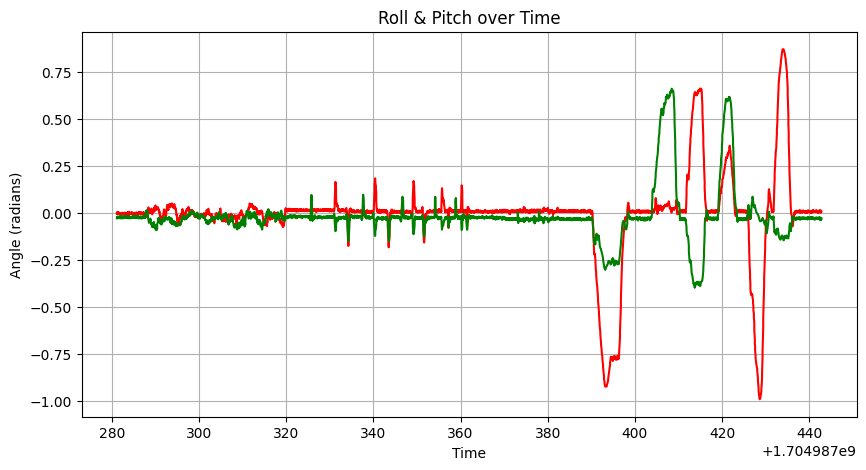

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(imu_data['Time'], imu_data['roll'], label='Roll', color='red')
plt.plot(imu_data['Time'], imu_data['pitch'], label='Pitch', color='green')
plt.xlabel('Time')
plt.ylabel('Angle (radians)')
plt.title('Roll & Pitch over Time')
plt.grid(True)


(-1.0, 1.0)

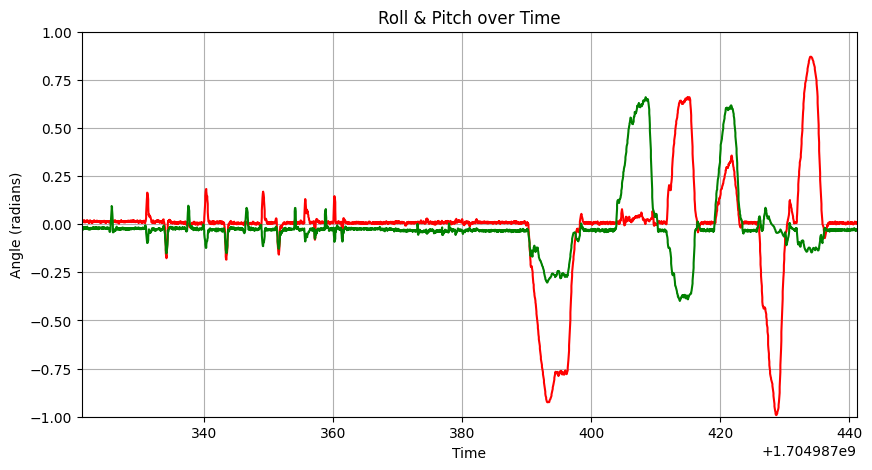

In [ ]:
# plot only after time 320

start = imu_data['Time'].iloc[0]

plt.figure(figsize=(10, 5))
plt.plot(imu_data['Time'], imu_data['roll'], label='Roll', color='red')
plt.plot(imu_data['Time'], imu_data['pitch'], label='Pitch', color='green')
#plt.plot(imu_data['Time'], imu_data['yaw'] + 0.7, label='Yaw', color='blue')
plt.xlabel('Time')
plt.ylabel('Angle (radians)')
plt.title('Roll & Pitch over Time')
plt.grid(True)
plt.xlim(start+40, start+160)
plt.ylim(-1, 1)
